In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
print(train_data[0].shape)
print(train_labels[0].shape)

(28, 28)
()


In [4]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
len(train_labels), len(test_labels)

(60000, 10000)

In [7]:
class_names = [
    "T-shirt/top",
    "Trouser/pants",
    "Pullover shirt",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
    ]

In [8]:
import matplotlib.pyplot as plt
import random

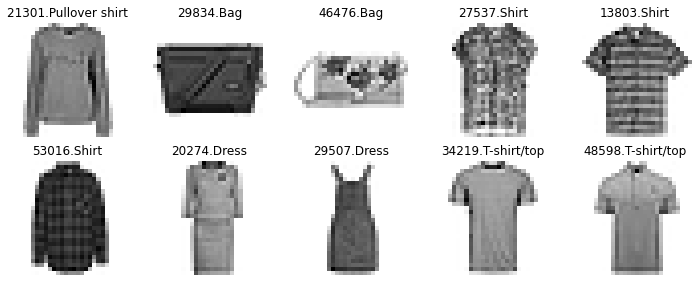

In [9]:
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
ax = ax.flatten()
for i in range(10):
    index = random.choice(range(len(train_data)))
    ax[i].imshow(train_data[index], cmap=plt.cm.binary)
    ax[i].set_title(f'{index}.{class_names[train_labels[index]]}')
    ax[i].axis(False)

plt.tight_layout()
plt.show()

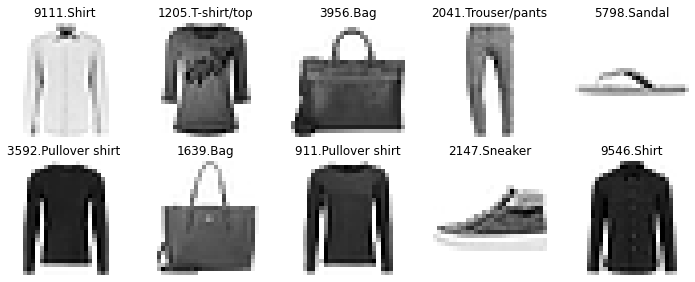

In [10]:
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
ax = ax.flatten()
for i in range(10):
    index = random.choice(range(len(test_data)))
    ax[i].imshow(test_data[index], cmap=plt.cm.binary)
    ax[i].set_title(f'{index}.{class_names[test_labels[index]]}')
    ax[i].axis(False)

plt.tight_layout()
plt.show()

In [11]:
print(f'Input shape : {train_data[0].shape[0]} x {train_data[0].shape[1]}')

Input shape : 28 x 28


In [12]:
print(f'Output shape : {len(class_names)}')

Output shape : 10


In [13]:
# Normalization ( 0 - 1)

train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [14]:
train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [15]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # labels are Integers
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

hist = model.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [16]:
import pandas as pd

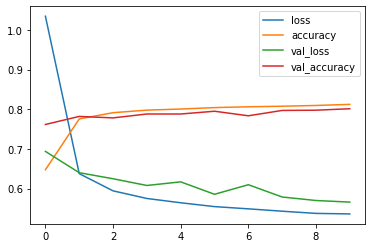

In [17]:
pd.DataFrame(hist.history).plot();

## Evaluationg the modelm

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

from IPython import display
display.set_matplotlib_formats('svg')

In [19]:
def displayConfusionMatrix(y_true, y_pred, text_size, classes=None, figsize = (10, 10)):

    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(
        title='Confusion Matrix',
        xlabel='Predicted Labels',
        ylabel='True Labels',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels,
        )

    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) / 2.0

    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)', 
        horizontalalignment='center', 
        color='white' if cm[i, j] > threshold else 'black',
        size=text_size)

In [20]:
class_names

['T-shirt/top',
 'Trouser/pants',
 'Pullover shirt',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [21]:
y_pred = np.argmax(model(test_data_norm),axis=1)
y_pred

array([9, 2, 1, ..., 3, 1, 5], dtype=int64)

In [22]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [23]:
print(f'Test accuracy : {sum(y_pred == test_labels) / test_labels.size}')

Test accuracy : 0.8014


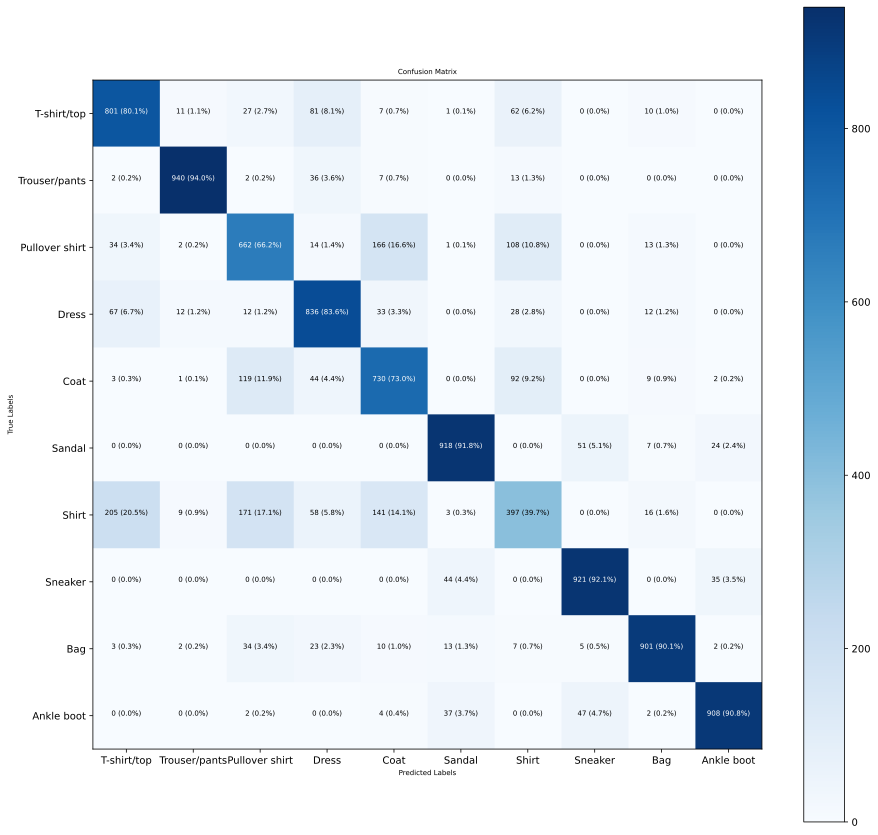

In [24]:
displayConfusionMatrix(test_labels, y_pred, 7, class_names, (15, 15))

In [63]:
import random

def plot_random_image(model, images, true_labels, classes):
    '''
    Pick random image, plot and predict
    '''
    i = random.randint(0, len(images))

    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    plt.imshow(target_image, cmap=plt.cm.binary)
    plt.axis(False)

    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.title(f'{pred_label}: P = {pred_probs.max():.2f} (True label : {true_label})', color=color)

    plt.show()

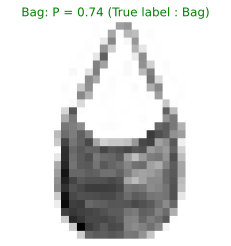

In [65]:
plot_random_image(model, test_data_norm, test_labels, class_names)